# EDA

In [1]:
#imports
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(".")
sys.path.append("..")

from clean_tweets_dataframe import Clean_Tweets

In [3]:
# reading data
tweet_df = pd.read_csv('../data/processed_tweet_data.csv')

In [4]:
#read pre-processed data 
cleaner = Clean_Tweets(tweet_df.copy())
tweet_df.head(5)

Automation in Action...!!!


,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,15760,2,i_ameztoy,20497,2621,NaN,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,6967,201,ZIisq,65,272,NaN,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,2166,0,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,2166,0,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,17247,381,VizziniDolores,910,2608,NaN,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"


In [5]:
tweet_df.isna().sum()

created_at                0
source                    0
original_text             0
polarity                  0
subjectivity              0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive    15809
hashtags                  0
user_mentions             0
place                  9893
dtype: int64

In [6]:
#stats about the numeriacl columns
tweet_df.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,22000.000000,22000.000000,2.200000e+04,22000.000000,2.200000e+04,22000.000000
mean,0.061325,0.283839,3.791884e+04,177.295636,1.796764e+04,1563.114455
std,0.223701,0.290963,8.952426e+04,498.320518,3.030478e+05,4358.651264
min,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,8.657500e+02,3.000000,5.700000e+01,137.000000
50%,0.000000,0.200000,7.133000e+03,39.000000,2.840000e+02,487.000000
75%,0.133333,0.468824,3.425750e+04,187.000000,1.324500e+03,1599.000000
max,1.000000,1.000000,1.717879e+06,17409.000000,1.449852e+07,208360.000000


<AxesSubplot: title={'center': 'Top 4 Locations'}, xlabel='Twitters', ylabel='Number of locations'>

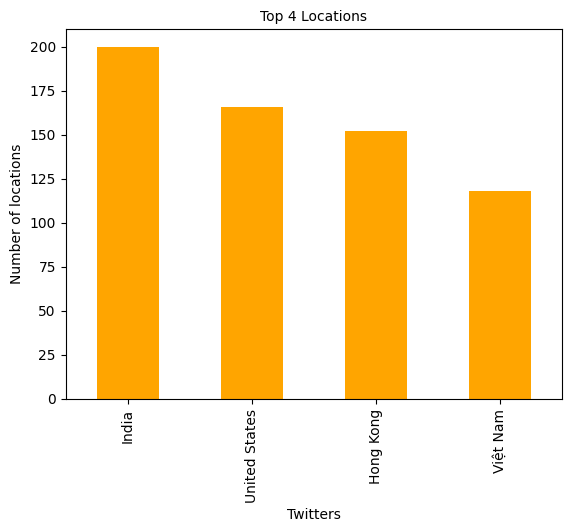

In [7]:
# top 4 locations of users
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitters', fontsize=10)
ax.set_ylabel('Number of locations' , fontsize=10)
ax.set_title('Top 4 Locations', fontsize=10)
tweet_df.place.value_counts()[:4].plot(ax=ax, kind='bar', color='orange')

In [8]:
#source of tweets
tweet_df["source"].value_counts()[:5]

<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    8391
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 6791
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      5212
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        634
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      171
Name: source, dtype: int64

<AxesSubplot: title={'center': 'Top 5 sources'}, xlabel='Twitters', ylabel='Number of sources'>

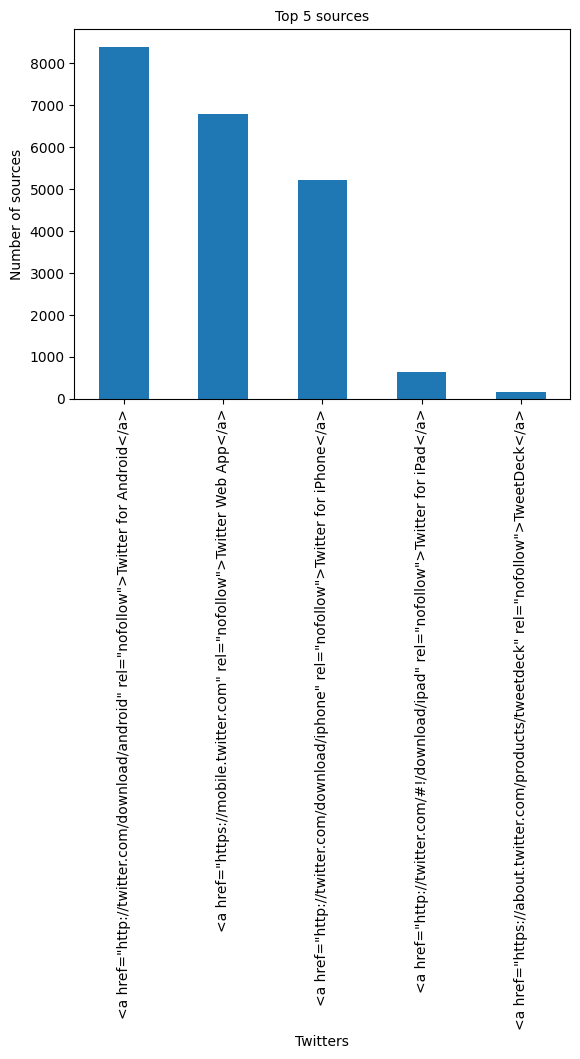

In [13]:
# top 5 sources of users
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitters', fontsize=10)
ax.set_ylabel('Number of sources' , fontsize=10)
ax.set_title('Top 5 sources', fontsize=10)
tweet_df.source.value_counts()[:5].plot(ax=ax, kind='bar')

In [9]:
# possible sensitive tweets
tweet_df["possibly_sensitive"].value_counts()

False    5961
True      230
Name: possibly_sensitive, dtype: int64

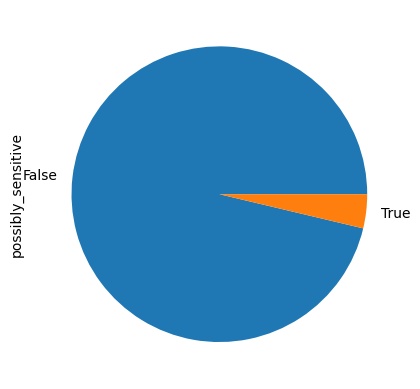

In [10]:
tweet_df["possibly_sensitive"].value_counts().plot(kind="pie");

In [11]:
tweet_df["polarity"].value_counts()

 0.000000    8985
-0.100000     973
 0.133333     782
 0.050000     502
 0.500000     502
             ... 
-0.014773       1
 0.478788       1
 0.059375       1
 0.010000       1
 0.207143       1
Name: polarity, Length: 829, dtype: int64

In [12]:
tweet_df.place.value_counts()

India                        200
United States                166
Hong Kong                    152
Việt Nam                     118
Taiwan                        99
                            ... 
Asia and the World             1
in my own universe🇺🇦🇪🇺🇸🇪       1
Nashville TN /Defiant CA😏      1
Maracaibo, Venezuela           1
🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈               1
Name: place, Length: 4409, dtype: int64